Gradient Descent Most of the Machine Learning problems boil down to
optimization of loss functions. For convex loss functions, optimization is done
using gradient descent. Find the concept for gradient descent here:
1. 2D function Let the function be
f (x) = x 2 + 3x + 2
Use the gradient descent algorithm to find the minima of this function.

Minima of the function is f(x)=-0.24999999766823944
It occurs at x=-1.499951711689173



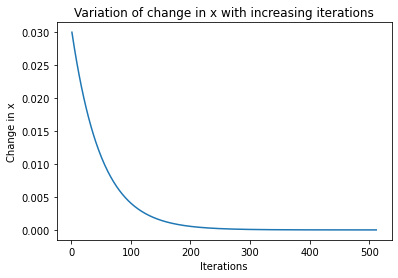

In [11]:
import matplotlib.pyplot as plt

def func(x):
  return (x**2 + 3*x +2)

def deriv_func(x):    # df(x)/dx
  return (2*x+3)

alpha=0.01    #learning parameter
eps=0.000001    #threshold value used to stop the iterations by checking change in consecutive x values

x1=0  # initial guess
x2=x1-alpha*deriv_func(x1)  # first step of gradient descent
iter=[1]  #list for the iteration number
count=1
change=[abs(x2-x1)] # change in consecutive x values
while abs(x2-x1)>eps:
  count+=1
  iter.append(count) #increasing iteration number
  x1=x2
  x2=x1-alpha*deriv_func(x1) #applying gradient descent
  change.append(abs(x2-x1))

print('Minima of the function is f(x)=',end='')
print(func(x2))
print('It occurs at x=',end='')
print(x2)
print()

# plotting the change in x vs iterations
plt.plot(iter,change)
plt.xlabel('Iterations')
plt.ylabel('Change in x')
plt.title('Variation of change in x with increasing iterations')
plt.show()

2. 3D function Let the function be
f (x 1 , x 2 ) = x 21 + x 22
Minimize this function using the gradient descent algorithm.

Minima of the function is f(x)=1.311730632238956e-09
It occurs at x1=1.6197102409004865e-05 , x2=3.239420481800973e-05 


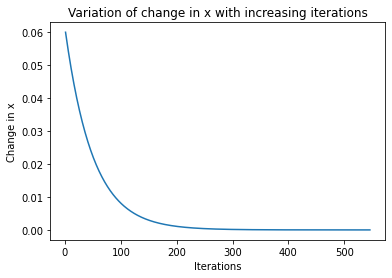

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def func_3d(x):
  return x[0]**2 + x[1]**2

def deriv_func_3d(x):
  return np.array([2*x[0],2*x[1]])

def abs_dist(x1,x2):    #used to calculate manhattan distance 
  return (abs(x1[0]-x2[0]) + abs(x1[1]-x2[1]))

alpha=0.01
eps=0.000001

x1=np.array([1,2])
x2=x1-[alpha*i for i in deriv_func_3d(x1)]  #applying gradient descent
iter=[1]
count=1
change=[abs_dist(x2,x1)]

while abs_dist(x2,x1)>eps:
  count+=1
  iter.append(count)
  x1=x2
  x2=x1-[alpha*i for i in deriv_func_3d(x1)]
  change.append(abs_dist(x2,x1))


print('Minima of the function is f(x)=',end='')
print(func_3d(x2))
print('It occurs at x1=',end='')
print(x2[0],end=' ')
print(', x2=',end='')
print(x2[1],end=' ')
print()
plt.plot(iter,change)
plt.xlabel('Iterations')
plt.ylabel('Change in x')
plt.title('Variation of change in x with increasing iterations')
plt.show()

3. Boolean Function Learning Consider the boolean functions:

y = f (x 1 , x 2 ) = x 1 .x 2


Train a Perceptron with 2 inputs, and 1 output to learn these functions.
Use the threshold according to the function. Use the Perceptron Learning
Algorithm for this. Plot the data points with the 2 output classes(True and
False) and the boundary that you learnt using the Perceptron Learning
Algorithm.

Number of epochs:
1000
Learning rate:
0.1


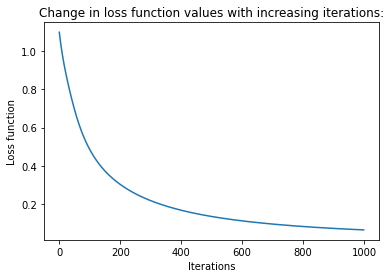

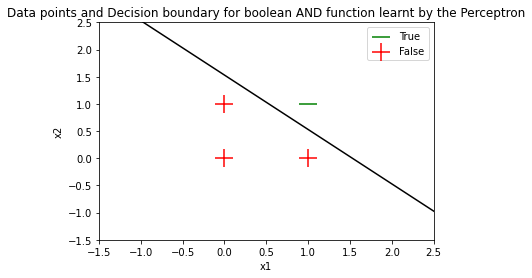

In [73]:
import numpy as np
import matplotlib.pyplot as plt

#Activation Function for output
def sigmoid(x):
    return 1/(1+np.exp(-x))

#derivative of sigmoid function
def deriv_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

w = np.random.randn(1,3) # Weights randomly initialized :[b w1 w2]
w[0][0]=0                # bias term set to zero
X = (np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])).T  # Four boolean inputs: each of the form [1 x1 x2] where the initial 1 is for incorporating the bias
y_true = np.array([0,0,0,1])      #Target ouputs for the above four inputs
y_pred = np.matmul(w,X).flatten() #Predicted outputs
alpha = 0.1                  #Learning rate
loss = []                    # to store the loss at each epoch
epochs = 1000                # Number of epochs to be executed
print('Number of epochs:')
print(epochs)
print('Learning rate:')
print(alpha)

for epoch_no in range(epochs):
    l = 0                       # Cost initialized as zero for each epoch
    for i in range(4):            #iterating over all the 4 inputs
        a=np.matmul(w,X[:,i])       #calculating wx+b
        y_pred = sigmoid(a)         # output of the perceptron
        err=y_true[i]-y_pred        #error in prediction
        w = w - lr*2*(-err)*deriv_sigmoid(a)*X[:,i] # Updating the weight parameters: w = w-alpha*derror/dw; derror/dw=(derror/dy_pred)*(dy_pred/da)*(da/dw)
        l = (l + err**2)                #Calculating loss in the current epoch
    loss.append(l)                        #storing the loss for each epoch
    

plt.plot(loss)
plt.xlabel("Iterations")
plt.ylabel("Loss function")
plt.title("Change in loss function values with increasing iterations:")
plt.show()

#Plotting the 4 inputs: true and false

plt.scatter(1,1,marker='_',color='g',s=300)
plt.scatter(1,0,marker='+',color='r',s=300)
plt.legend(['True','False'],loc='best')
plt.scatter(0,1,marker='+',color='r',s=300)
plt.scatter(0,0,marker='+',color='r',s=300)

x = np.arange(-1,100,2.5)

#Plotting the Decision Boundary
y = (-w[0][0]-w[0][1]*x)/w[0][2]    # y = -(b + w1*x1)/w2
plt.plot(x,y,color='k')
plt.xlim(-1.5,2.5)
plt.ylim(-1.5,2.5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Data points and Decision boundary for boolean AND function learnt by the Perceptron")
plt.show()


y = f (x 1 , x 2 ) = x 1 ⊕ x 2

Train a Perceptron with 2 inputs, and 1 output to learn these functions.
Use the threshold according to the function. Use the Perceptron Learning
Algorithm for this. Plot the data points with the 2 output classes(True and
False) and the boundary that you learnt using the Perceptron Learning
Algorithm.

Number of epochs:
1000
Learning rate:
0.1


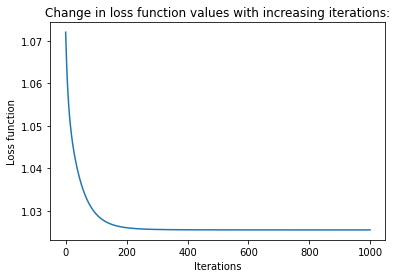

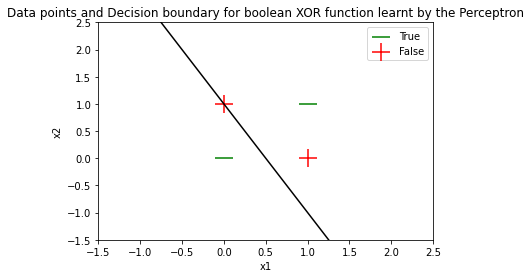

In [74]:
import numpy as np
import matplotlib.pyplot as plt

#Activation Function for output
def sigmoid(x):
    return 1/(1+np.exp(-x))

#derivative of sigmoid function
def deriv_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

w = np.random.randn(1,3) # Weights randomly initialized :[b w1 w2]
w[0][0]=0                # bias term set to zero
X = (np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])).T  # Four boolean inputs: each of the form [1 x1 x2] where the initial 1 is for incorporating the bias
y_true = np.array([1,0,0,1])      #Target ouputs for the above four inputs
y_pred = np.matmul(w,X).flatten() #Predicted outputs
alpha = 0.1                  #Learning rate
loss = []                    # to store the loss at each epoch
epochs = 1000                # Number of epochs to be executed
print('Number of epochs:')
print(epochs)
print('Learning rate:')
print(alpha)

for epoch_no in range(epochs):
    l = 0                       # Cost initialized as zero for each epoch
    for i in range(4):            #iterating over all the 4 inputs
        a=np.matmul(w,X[:,i])       #calculating wx+b
        y_pred = sigmoid(a)         # output of the perceptron
        err=y_true[i]-y_pred        #error in prediction
        w = w - lr*2*(-err)*deriv_sigmoid(a)*X[:,i] # Updating the weight parameters: w = w-alpha*derror/dw; derror/dw=(derror/dy_pred)*(dy_pred/da)*(da/dw)
        l = (l + err**2)                #Calculating loss in the current epoch
    loss.append(l)                        #storing the loss for each epoch
    

plt.plot(loss)
plt.xlabel("Iterations")
plt.ylabel("Loss function")
plt.title("Change in loss function values with increasing iterations:")
plt.show()

#Plotting the 4 inputs: true and false

plt.scatter(1,1,marker='_',color='g',s=300)
plt.scatter(1,0,marker='+',color='r',s=300)
plt.legend(['True','False'],loc='best')
plt.scatter(0,1,marker='+',color='r',s=300)
plt.scatter(0,0,marker='_',color='g',s=300)

x = np.arange(-1,100,2.5)

#Plotting the Decision Boundary
y = (-w[0][0]-w[0][1]*x)/w[0][2] # y = -(b + w1*x1)/w2
plt.plot(x,y,color='k')
plt.xlim(-1.5,2.5)
plt.ylim(-1.5,2.5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Data points and Decision boundary for boolean XOR function learnt by the Perceptron")
plt.show()


As evident from the plots of the above points, the two classes (true and false) cannot be separated using a single line. In other words, the boolean XOR function is not linearly separable. So we cannot implement it using a single perceptron. 

We can use multiple perceptrons for this. 

x1 XOR x2 = x1.x2' + x1'.x2

So this can be implemented using NOT and OR functions which are both linearly separable and need a single perceptron. 